# Sprint 1 
by Anne-Sophie Howard

In [29]:
# general libraries
import numpy as np
import pandas as pd

# single cell libraries
import scanpy as sc
import anndata as ad
#import h5py

# library for parallelization of the tasks
#import os
#import dask

# Visualization
#from colorama import Fore
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import seaborn as sns

# Read mtx files
from scipy.io import mmread

# Pytorch ecosystem
#import torch

In [27]:
b_ = Fore.BLUE
c_ = Fore.CYAN
g_ = Fore.GREEN
m_ = Fore.MAGENTA
r_ = Fore.RED
y_ = Fore.YELLOW

In [17]:
# data from the cite-seq
df_cite_train_x = pd.read_hdf('data/train_cite_inputs.h5')
display(df_cite_train_x.head())

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [18]:
dir(df_cite_train_x)

['ENSG00000005471_ABCB4',
 'ENSG00000008311_AASS',
 'ENSG00000011198_ABHD5',
 'ENSG00000023839_ABCC2',
 'ENSG00000033050_ABCF2',
 'ENSG00000064687_ABCA7',
 'ENSG00000073734_ABCB11',
 'ENSG00000081760_AACS',
 'ENSG00000085563_ABCB1',
 'ENSG00000087884_AAMDC',
 'ENSG00000090861_AARS',
 'ENSG00000091262_ABCC6',
 'ENSG00000094914_AAAS',
 'ENSG00000097007_ABL1',
 'ENSG00000099204_ABLIM1',
 'ENSG00000100439_ABHD4',
 'ENSG00000100997_ABHD12',
 'ENSG00000101986_ABCD1',
 'ENSG00000103222_ABCC1',
 'ENSG00000103591_AAGAB',
 'ENSG00000106077_ABHD11',
 'ENSG00000107331_ABCA2',
 'ENSG00000107362_ABHD17B',
 'ENSG00000108798_ABI3',
 'ENSG00000108846_ABCC3',
 'ENSG00000109576_AADAT',
 'ENSG00000114770_ABCC5',
 'ENSG00000114779_ABHD14B',
 'ENSG00000115657_ABCB6',
 'ENSG00000115977_AAK1',
 'ENSG00000117528_ABCD3',
 'ENSG00000118777_ABCG2',
 'ENSG00000119688_ABCD4',
 'ENSG00000121410_A1BG',
 'ENSG00000124574_ABCC10',
 'ENSG00000124608_AARS2',
 'ENSG00000125257_ABCC4',
 'ENSG00000127220_ABHD8',
 'ENSG00000

In [19]:
# have a look at the dataset
df_cite_train_x.head()

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [25]:
# converting the dataframe into a anndata bject to be able to use the scanpy library
train_cite_anndata = adata = sc.AnnData(df_cite_train_x)

In [30]:
print(f"{b_}The GEX data has {r_}{train_cite_anndata.n_obs}{b_} observations and {r_}{train_cite_anndata.n_vars}{b_} features.")

The GEX data has 70988 observations and 22050 features.


In [ ]:
# Extra code to keep for later
# read our dataset into a dataframe
ddf = dd.read_hdf(
    os.path.join("data", "train_multi_inputs" "*.h5"), 'train_multi_inputs',
)
ddf

# settings
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

results_file = 'write/sprint1.h5ad'  # the file that will store the analysis results

# Using dask
# import module to read in pandas dataframe with dask
import dask.dataframe as dd

# Lymphoma dataset

In this project we aim at using unsupervised classification from different blood samples, malignant and non malignant, trying to describe more finely the biological status of different lymphoma.
Here we focus and as such the heterogeneity of non-hodgkin B-cell lymphoma which take their origin in the Germinal Center reaction.
In this dataset we have 4 samples of reactive lymphe nodes (non malignant samples), 4 Follicular lymphoma (slow evolving lymphoma), 2 transformed follicular lymphoma (initially classified as follicular lymphoma, the cancer evolved towards a more aggressvie fast growing cancer), and 3 DLBCL (fast growing lymphoma).

In the spring 1 we will describe the samples available: number of cells per sample, type of cells (B or T cells).
We will describe one of the sample  a bit more in details, the  rLN1 sample (no malignant).

In [12]:
# Read the description file
sample_sheet_df = pd.read_csv("data_FL\AnnotationCells.csv", delimiter = ";")

In [13]:
sample_sheet_df.head()

,Sample,Barcode,Population
0,DLBCL1,AAACCTGAGCCATCGC,MalignantB
1,DLBCL1,AAACCTGAGCCTTGAT,MalignantB
2,DLBCL1,AAACCTGGTTAAGATG,MalignantB
3,DLBCL1,AAACCTGGTTAAGGGC,MalignantB
4,DLBCL1,AAACCTGTCATTTGGG,MalignantB


In [14]:
sample_sheet_df.shape

(26594, 3)

The dataset contains 26594 cells. We will take a look a the number of cells for each kind of sample.

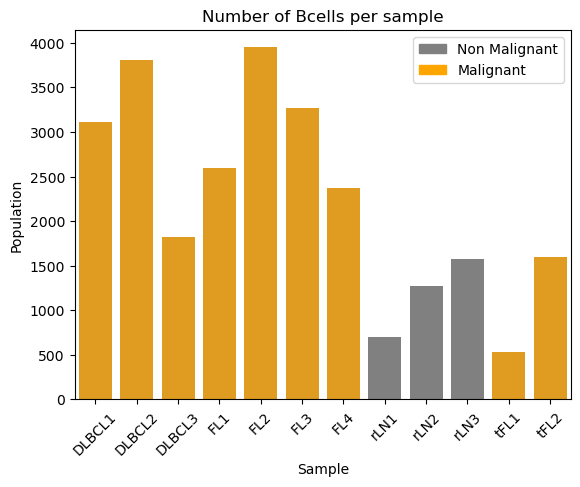

In [15]:
# We differentiate the malignant and non malignant samples
cell_number_df = sample_sheet_df.groupby('Sample')['Population'].count().reset_index()

cols = ['grey' if ((x == "rLN1" )| (x== "rLN2" )| (x == "rLN3")) else 'orange' for x in cell_number_df['Sample']]

plt.figure()
sns.barplot(x = 'Sample',
            y = 'Population',
            data = cell_number_df,
            palette = cols
            )
plt.xticks(rotation = 45)
pop_a = mpatches.Patch(color = 'grey', label = 'Non Malignant')
pop_b = mpatches.Patch(color = 'orange', label = 'Malignant')
plt.legend(handles = [pop_a,pop_b])
plt.title('Number of Bcells per sample')
plt.show()

In [22]:
# I want to check the status of each cell in each sample. id : are all cells malignant in DLBCL?
cell_type_df = sample_sheet_df.groupby(['Sample', 'Population'])['Barcode'].count().reset_index()
cell_type_df

,Sample,Population,Barcode
0,DLBCL1,MalignantB,3114
1,DLBCL2,MalignantB,3779
2,DLBCL2,Myeloid,26
3,DLBCL3,MalignantB,1798
4,DLBCL3,Myeloid,21
5,FL1,MalignantB,2597
6,FL2,MalignantB,3949
7,FL3,HealthyB,29
8,FL3,MalignantB,3221
9,FL3,Myeloid,22


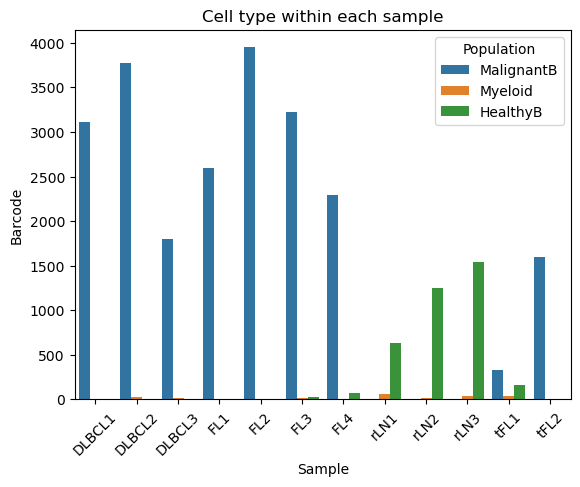

In [17]:
# Let's plot the type and number of cells within each sample
plt.figure()
sns.barplot(x = 'Sample',
            y = 'Barcode',
            data = cell_type_df ,
            hue = 'Population'
            )
plt.xticks(rotation = 45)
plt.title('Cell type within each sample')
plt.show()

This graph shows that while some samples are from patient with lymphoma, some cells within the sample can be considered healthy, id non malignant. The samples even contain some myeolid cells which are another type of blood cells than the lymphocytes. Lymphocytes being the type of blood cells where the lymphoma take their origin.

While here we ar interrested in the genes expression of B cells (the malignant cells in non-B-cells lymphoma), looking at the T-cells population might also be of interest. T-cells are a very important component of the B-cells in an healthy environement. It is reasonable to question whether they play a role in B-cell lymphoma (initiation, maintenance, or even transformation). This dataset contains some information about the T-cells population, we will try to include those into our analysis.
We will first take a look at the repartition of the T-cells population

In [18]:
# readiing the file about T-cells
T_Cells_df = pd.read_csv('data_FL/Annotation_tcells.csv', delimiter = ";")

In [19]:
T_Cells_df.head()

,Barcode,Sample,Population
0,AAACGGGTCTTGACGA,tFL2,TTOX
1,AAAGCAAAGGCGCTCT,tFL2,TTOX
2,AAATGCCGTAGCACGA,tFL2,TTOX
3,AACCATGGTACCAGTT,tFL2,TTOX
4,AAGTCTGAGATGGCGT,tFL2,TTOX


In [20]:
# Let's take a look at the T-cells repartio betweent the sample
T_cell_group_df = T_Cells_df.groupby(['Sample', 'Population']).count()['Barcode'].reset_index()

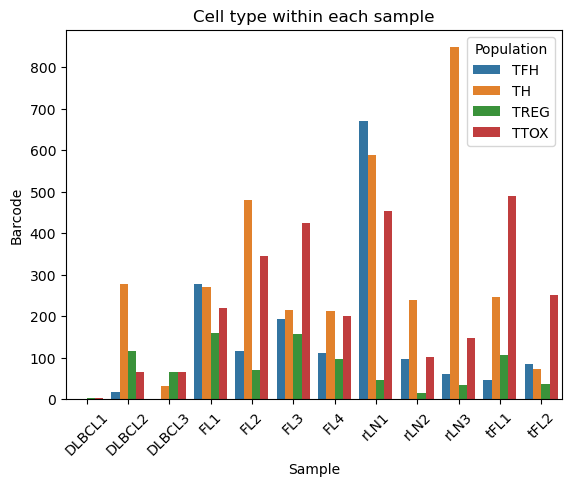

In [21]:
plt.figure()
sns.barplot(x = 'Sample',
            y = 'Barcode',
            data = T_cell_group_df ,
            hue = 'Population'
            )
plt.xticks(rotation = 45)
plt.title('Cell type within each sample')
plt.show()

From this graph we can see that 4 kind of T-cells have been ideentified in this dataset, with an hetergenous repartition of them anog the different samples.

In [28]:
# I will now have a look at the first file rLN1
# Each sample contains 3 files

In [ ]:
# a genes.tsv file
rLN1_genes_df = pd.read_csv ("data_FL/rLN1/genes.tsv", sep = '\t') 

In [25]:
rLN1_genes_df.head()

,ENSG00000243485,RP11-34P13.3
0,ENSG00000237613,FAM138A
1,ENSG00000186092,OR4F5
2,ENSG00000238009,RP11-34P13.7
3,ENSG00000239945,RP11-34P13.8
4,ENSG00000239906,RP11-34P13.14


In [26]:
# a barcodes.tsv file
rLN1_barcodes_df = pd.read_csv ("data_FL/rLN1/barcodes.tsv", sep = '\t') 

In [27]:
rLN1_barcodes_df.head()

,AAACCTGCAAGGCTCC-1
0,AAACCTGCAGGTCGTC-1
1,AAACCTGGTTCCACTC-1
2,AAACCTGTCTGATACG-1
3,AAACGGGAGCGGCTTC-1
4,AAACGGGAGGTGTTAA-1


In [ ]:
# a matrix.mtx
rLN1_matrix = mmread('data_FL/rLN1/barcodes.tsvmatrix.mtx')